In [1]:
from cv2 import VideoCapture
import cv2

In [2]:
%matplotlib inline
from pylab import imshow

In [36]:
cam = VideoCapture(0)
cam.set(cv2.CAP_PROP_BRIGHTNESS, 1000)
cam.set(3, 1600)
cam.set(4, 900)

True

In [33]:
result

(False, None)

In [ ]:
imshow(image)

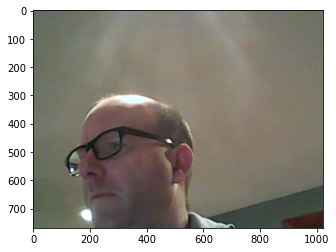

In [8]:
result, image = cam.read()
image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
imshow(image)

In [9]:
def take_picture(filename='picture.jpg',view=False):
    global _cam
    from cv2 import VideoCapture
    import cv2    
    from pylab import imshow
    
    try:
        _cam==None
    except NameError:
        _cam = VideoCapture(0)
        
    
    result, image = cam.read()
    
    
    if view:
        imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))        
        
    print("Saving ",filename)
    cv2.imwrite(filename,image)
    
    


Saving  picture.jpg


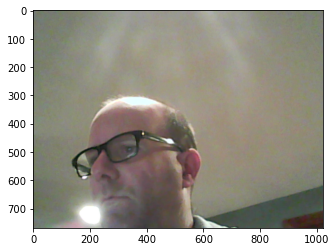

In [12]:
take_picture(view=True)

## Copy the file to the robot

In [48]:
def scp(local,remote,user_hostname=None,passwd=None):
    import os
    assert not passwd is None
    assert not user_hostname is None
    assert '@' in user_hostname
    cmd="sshpass -p %s scp -o StrictHostKeyChecking=no '%s' %s:'%s'" % (passwd,local,user_hostname,remote)
    print(cmd)
    #os.system(cmd)

In [49]:
scp('picture.jpg','python/picture.jpg','pi@10.2.2.30','whatever the robot password is')

sshpass -p robots1234 scp -o StrictHostKeyChecking=no 'picture.jpg' pi@10.2.2.30:'python/picture.jpg'
